Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> GMM y KNN </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: Viernes 29 de Septiembre
    </p>
    <br>
</center>

<br>


## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.
- En el caso de que se encuentren con problemas al correr celdas por el tamaño del dataset, esta permitido trabajar con una muestra representativa de este, siempre explicitando y justificando sus deciciones.

---


## Librerías

In [68]:
##Importa acá las librerias que vayas a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
from collections import Counter

#Seed

In [69]:
from random import seed

seed(2433)
#No cambiar la seed ya que se usara para su recorrecion

# Parte 1: Carga y Preprocesamiento (10 puntos)

## 1.1 Carga de datos (2 puntos)

Para esta tarea deberás trabajar con el dataset que está en Canvas.

In [70]:
digits = pd.read_csv('digits.csv')

## 1.2 Descripcion del Dataset (4 puntos)



#### ¿Qué representa cada fila en el dataset entregado? (2 puntos)

RESPUESTA:


In [71]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


👉🏻 En base al dataset **digits** entregado, podemos decir que cada fila representa una imagen de un digito (entre 0 y 9, inclusive), y todas las columnas, excepto label, contienen la informacion de la imagen del digito en cuestion (ubicado en la columna _label_). 

En resumen, las columnas pixel-0 a pixel-783 contienen la informacion de la imagen del digito, y la columna label contiene el digito al que corresponde la imagen.


#### ¿Es posible en este dataset eliminar columnas sin afectar de manera significativa los datos? ¿Por qué? (2 puntos)

REPUESTA:

👉🏻 Diria que no seria posible eliminar columnas sin afectar de manera significativa los datos para todos los casos. Ya que, en base al dataset entregado, tenemos que cada digito es representado por una imagen que contiene 784 pixeles, es decir, el digito se podria representar en una imagen de 28x28 pixeles. Por lo tanto, la eliminacion de un pixel podria afectar en la prediccion de un digito dentro de un modelo predictivo. Por ejemplo para el digito 8, podria ocurrir un caso critico en donde se elimina el pixel cuya ubicacion se encuentra justamente en la "interseccion" de los dos circulos que conforman el digito 8, y por lo tanto, el modelo podria predecir que el digito es un 0, ya que no se encuentra el pixel que "une" los dos circulos.

## 1.3 Determina si existen datos nulos. En caso de que existan, eliminalos del dataset. (2 puntos)

RESPUESTA:

In [72]:
digits[digits.isnull().any(axis=1)] 
# Podemos verificar que ninguna fila tiene valores nulos

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


## 1.4 Manejo del Dataset (2 puntos)
Normaliza los valores de las columnas del dataset. ¿Por qué esto es importante?

RESPUESTA:

In [73]:
y = digits['label'] # Guardamos el vector de etiquetas como variable de respuesta
digits.drop(columns=['label'], inplace=True) # Eliminamos la columna de etiquetas del dataset
X = digits # Nuevo data-set sin la columna de etiquetas


In [74]:
# Normalizaremos los datos con el metodo MinMaxScaler
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

👉🏻 Realizar el metodo de normalizacion MinMaxScaler nos permite determinar un rango de valores en comun para los datos del datasert. Esto implica un mejor procesamiento de los datos al llevarlos a cabo dentro de un modelo, por lo que nos permite generar predicciones mas acertadas. En este sentido, al tener los datos escalados dentro en un rango de valores iguales nos permitira obtener resultados menos redundantes, y una mejor precision al momento de usar en el modelo

# Parte 2: Preguntas Teóricas (10 puntos)

### 2.1 ¿Qué es un modelo Gaussian Mixtures? ¿En qué escenarios funciona bien y en qué mal? Refierete a esto según el dataset. (5 puntos)

RESPUESTA:

👉🏻 Un modelo Gaussian Mixtures es un modelo probabilistico que asume que los datos provienen de una mezcla de distribuciones gaussianas. El objetivo de GMM es generar datos sinteticos a partir de la estimacion de parametros de una distribucion gaussiana. En este sentido, GMM tiene como idea sintetizar los datos a partir de distribuciones normales, tal que al utilizar un set de datos, obtenemos la probabilidad de observacion condicionada a los parametros estimados, para asi obtener un muestreo de datos estimados. 

El modelo GMM realiza un algoritmo denominado *Expectative Maximization (EM)*, y cuyo objetivo es maximizar la funcion de log-verosimilitud  para poder obtener los parametros estimados de la distribucion gaussiana. Esta funcion nos permite obtener que tan probable es observar cada dato del dataset a partir de los parametros estimados. Por otra parte, EM presenta tres pasos principales para poder obtener los parametros estimados de la distribucion gaussiana que maximizan la funcion de *log-verosimilitud*: 

1. **Initialization**, inicializa las medias, covarianzas y los pesos de la mezcla
2. **Expectative Step (E-Step)**, tiene como objetivo calcular la probabilidad de observacion de cada dato utilizando los parametros estimados del modelo
3. **Maximization Step (M-Step)**, tiene como objetivo actualizar los parametros estimados, maximizando la verosimilitud para cada data perteneciente a la distribucion gaussiana, hasta que se alcance la convergencia. 

En resumen, el modelo GMM realiza un _clustering probabilistico_, es decir, asigna a cada dato una distribucion de probabilidad, y no un unico cluster. 


👉🏻 Como GMM es un modelo de mezcla que asume que todos los datos son generatos por una mezcla de distribuciones gaussianas, una de las principales ventajas es que funciona de mejor manera cuando el dataset es numerico. Como por ejemplo en el caso de ```digits.csv```, funcionaria de mejor manera que para el caso de un dataset que presente variables categoricas. Esto se debe a que a cada dato se le asigna una distribucion normal. Tambien, otro escenario en donde GMM funciona bien es cuando se presentan grandes cantidades de datos, como es el caso de ```digits.csv``` para poder estimar los parametros de una distribucion gaussiana. Utilizar GMM para realizar clustering en un dataset es una buena opcion, ya que GMM nos provee informacion mas específica en terminos de probabilidades para poder determinar la pertenencia de cada dato a un cluster especifico. 

Por otra parte, GMM funcionaría mal cuando los datos no se distribuyen de manera normal, ya que GMM asume que los datos son muestras independientes para no interferir en la estimacion de los parametros del modelo. En consecuencia, los resultados serian menos acertados, y el muestreo de los datos afectaria al resto de los datos. 

### 2.2 Explica qué es Akaike Information Criterion ¿Existe alguno que se ajuste mejor a este dataset? Justifique su respuesta. (5 puntos)

RESPUESTA:

El **Criterio de Informacion de Akaike** nos permite determinar que tan bien se ajusta un modelo frente a los datos generados. Este se define como la diferencia entre la complejidad del modelo (k) y el valor maximo de la funcion de verosimilitud (L): 
$$AIC = 2k - 2\ln{(L)}$$
El objetivo de este criterio tiene como fin encontrar un valor que determine el modelo que se ajusta de mejor manera a los datos segun su complejidad y  verosimilitud. El modelo que presente el valor de AIC mas bajo corresponderá al mejor modelo. En este sentido, entre mas grande la verosimilitud y mas baja la complejidad, sera un buen criterio para escoger la cantidad de k componentes del modelo. 


# Parte 3: GMM (28 puntos)


## 3.1 PCA y Visualizacion Inicial (6 puntos)


Utiliza PCA de dos dimensiones para colorear los distintos digitos presentes en el dataset. (3 puntos)

RESPUESTA:

In [75]:
pca = PCA(n_components=2)  
X_reduced = pca.fit_transform(X_scaled) # reducimos el dataset a 2 componentes

In [76]:
# Grafico que ilustra el PCA de dos dimensiones coloreado los distintos digitos de 0 a 9
def plot_embedding(X,title):
    _, ax = plt.subplots(figsize=(8, 8))

    for digit in np.unique(y):
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit), 
            alpha=0.420,
        )
    ax.set_title(title)
    ax.axis("off")

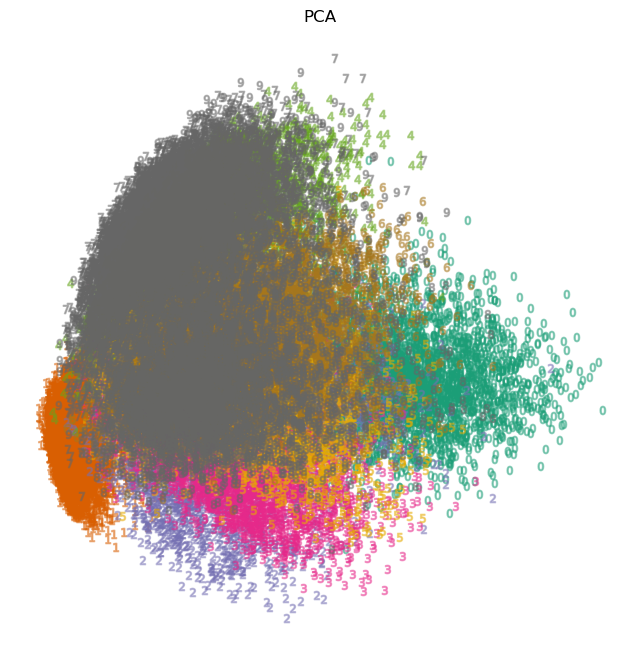

In [77]:
plot_embedding(X_reduced, "PCA")

Visualizando los digitos, ¿Cuáles son los que más se parecen entre ellos? Especula en que cantidad de clusters sería posible agrupar a los digitos, fuera de un cluster por cada uno. (3 puntos)

RESPUESTA:

👉🏻 Visualizando el grafico, podemos verificar que los datos mas 'parecidos' son los que se encuentran mas cerca, como por ejemplo el 5 y 6. Mientras que los datos mas distitnos, son los que se encuentran mas lejos, como el 1 y 0.

Analizando especificamente el grafico, podriamos decir que los digitos que mas se parecen serian el 7, 8, 9. Dado que estos se encuentran totalmente agrupados y no se logran diferenciar dentro del grafico. Esto pasa tambien con el 5 y el 6.

Podriamos especular que existirá una cantidad aproximada de 6 clusters, ya que en base al grafico, podemos agrupar los siguientes digitos segun que tan posible se pueden distinguir visualmente. 
* 2
* 1 
* 5, 6
* 7, 8, 9,
* 4
* 0



# 3.2 Retención Varianza (4 puntos)

Encuentre el numero mínimo de componentes para usar en PCA de tal manera que se mantenga un 75% de varianza. (4 puntos)

RESPUESTA:

In [78]:
pca_2 = PCA(0.75, whiten=True) # Componentes con 75% de varianza retenida
X_pca = pca_2.fit_transform(X_scaled)
X_pca.shape # Obtenemos que el minimo de componentes son 33 para retener el 75% de varianza

(42000, 33)

# 3.3 Funcion clusterize (5 puntos)

Codifica una función que utiliza el modelo `GaussianMixture` de sklearn para separar a los digitos en `n` grupos. Debe retornar un dataframe que contenga la clasificación. Corre el método con `n=10`. (5 puntos)

RESPUESTA:

In [79]:
def clusterize(X, y, n): # Retorna un datafram con las columnas: Label (digitos originales); Cluster (Clasificacion por GMM)
    gmm = GaussianMixture(n, covariance_type='full')
    gmm.fit(X)
    df = pd.DataFrame({'cluster': gmm.predict(X), 'label': y})
    return df

In [80]:
df_classificated =  clusterize(X_pca, y, 10) 

# 3.4 Preguntas con GMM (5 puntos)

#### 1. Dado cada cluster, ¿Se puede decir que GMM logro agrupar de forma correcta los distintos digitos? (2.5 puntos)

RESPUESTA:

In [82]:
for i in range(10):
    cluster = df_classificated['cluster'].value_counts().to_dict()[i]
    label = df_classificated['label'].value_counts().to_dict()[i]
    error = ((cluster - label) / label ) * 100
    print(f'i: {i} -> cluster: {cluster} - label: {label} - error relativo: {round(error, 3)}%')

i: 0 -> cluster: 5994 - label: 4132 - error relativo: 45.063%
i: 1 -> cluster: 3839 - label: 4684 - error relativo: -18.04%
i: 2 -> cluster: 3950 - label: 4177 - error relativo: -5.435%
i: 3 -> cluster: 2056 - label: 4351 - error relativo: -52.746%
i: 4 -> cluster: 2155 - label: 4072 - error relativo: -47.078%
i: 5 -> cluster: 3825 - label: 3795 - error relativo: 0.791%
i: 6 -> cluster: 6655 - label: 4137 - error relativo: 60.865%
i: 7 -> cluster: 4812 - label: 4401 - error relativo: 9.339%
i: 8 -> cluster: 3262 - label: 4063 - error relativo: -19.714%
i: 9 -> cluster: 5452 - label: 4188 - error relativo: 30.181%


👉🏻 Podriamos decir que GMM logro agrupar de forma correcta los distintos digitos, dado que al comparar la cantidad total de digitos entre las columnas 'label'
y 'clusters', podemos visualizar que la cantidad de digitos por cluster es bastante similar a la cantidad de digitos por label del dataset original. Ademas, el error relativo correspondiente a cada valor no supera la totalidad (100%).  

#### 2. ¿Existe algún(os) digito que se encuentre repartido en mas de 2 clusters? ¿Cuáles? (2.5 puntos)

RESPUESTA:

In [83]:
print(df_classificated[['label', 'cluster']].to_string(index=False))

 label  cluster
     1        3
     0        5
     1        4
     4        7
     0        5
     0        5
     7        8
     3        0
     5        0
     3        0
     8        9
     9        2
     1        4
     3        0
     3        0
     1        3
     2        6
     0        5
     7        8
     5        0
     8        9
     6        1
     2        6
     0        5
     2        6
     3        0
     6        1
     9        2
     9        8
     7        8
     8        9
     9        7
     4        7
     9        2
     2        6
     1        4
     3        6
     1        4
     1        3
     4        2
     9        9
     1        4
     4        7
     4        7
     2        6
     6        1
     3        0
     7        8
     7        2
     4        7
     7        8
     5        0
     1        4
     9        7
     0        5
     2        7
     2        6
     3        0
     9        2
     1        4
     1        6
     1  

In [84]:
def give_clusters(df):  # Funcion que retorna cada digito y los clusters al cual fue clasificado
    dict_digits = {i : set() for i in range(0,10)}
    for i in range(df.shape[0]):
        cluster = df['cluster'][i]
        digit = df['label'][i]
        dict_digits[digit].add(cluster) # Para cada digito guardo el cluster en el cual fue clasificado
    for key, value in dict_digits.items():
        print(f'{key} - {value}')

In [85]:
give_clusters(df_classificated)


0 - {0, 5, 6, 7, 9}
1 - {1, 2, 3, 4, 6, 7, 8, 9}
2 - {0, 1, 2, 5, 6, 7, 8, 9}
3 - {0, 2, 5, 6, 7, 8, 9}
4 - {1, 2, 4, 5, 6, 7, 8, 9}
5 - {0, 1, 2, 5, 6, 7, 9}
6 - {0, 1, 5, 6, 7, 9}
7 - {0, 2, 5, 6, 7, 8, 9}
8 - {0, 1, 2, 4, 5, 6, 7, 8, 9}
9 - {0, 2, 5, 6, 7, 8, 9}


👉🏻 Dado el resultado anterior podemos visualizar que **todos** los digitos fueron clasificados en mas de 2 clusters. Por ejemplo, 
podemos decir que el 0 fue clasificado dentro de los clusters 0, 5, 6, 7, y 9. En este sentido, el modelo predijo que el 0 **podria** pertenecer a 5 clusters distintos (clasificandolo como 0, 5, 6, 7, **o** 9).
Dentro de todo, tiene sentido que todos los digitos estan clasificados en mas de un cluster, ya que al analizar el grafico, estos no se encuentran completamente separados en grupos con una distancia decente entre si.


# 3.5 Evaluación modelo GMM (5 puntos)

Determine el dígito predominante de cada cluster según el número que más se repita por grupo. Con este digito determinado, calcule la precisión de cada dígito al ser clasificado. (5 puntos)

RESPUESTA:

In [99]:
# Funcion que nos facilitara visualizar la estructura de un diccionario :)
def print_dict(dict):
    for key, values in dict.items():
        print(f'{key} * {values}')

In [100]:
# Guardamos el cluster y la cantidad de veces que se clasifico como el digito {i}
dict_clusters = {i : Counter() for i in range(0,10)} # key=cluster : value= 'diccionario que guarda digito : count'
for i in range(df_classificated.shape[0]):
    cluster = df_classificated['cluster'][i]
    digit = df_classificated['label'][i]
    dict_clusters[cluster][digit] += 1 # Para el cluster "cluster" se guardara el digito "digit" en dict. 

print_dict(dict_clusters)
    
# Aca podemos visualizar de mejor manera los digitos que fueron agrupados para cada cluster
# Por ejemplo, para el cluster 0, tenemos que el digito que mas se repite es el 3. Es decir, el digito 3 fue clasificado en la mayoria 
# de las iteraciones como el digito 0. 

0 * Counter({3: 3312, 5: 2067, 8: 440, 6: 64, 0: 49, 9: 47, 2: 8, 7: 7})
1 * Counter({6: 3816, 5: 9, 4: 5, 2: 5, 8: 2, 1: 2})
2 * Counter({7: 1455, 4: 1420, 9: 1045, 8: 14, 1: 9, 2: 4, 3: 2, 5: 1})
3 * Counter({1: 2056})
4 * Counter({1: 2153, 8: 1, 4: 1})
5 * Counter({0: 3789, 6: 13, 2: 7, 9: 4, 7: 4, 5: 3, 8: 2, 4: 2, 3: 1})
6 * Counter({2: 4077, 8: 1149, 3: 352, 0: 234, 7: 224, 4: 186, 9: 139, 6: 136, 5: 80, 1: 78})
7 * Counter({4: 2384, 9: 1646, 7: 662, 3: 47, 2: 28, 5: 23, 8: 10, 1: 9, 6: 2, 0: 1})
8 * Counter({7: 1989, 9: 1233, 4: 27, 3: 6, 1: 3, 2: 3, 8: 1})
9 * Counter({8: 2444, 5: 1612, 3: 631, 1: 374, 6: 106, 9: 74, 7: 60, 0: 59, 4: 47, 2: 45})


In [101]:
# Creamos un diccionario con el cluster y el digito respectivo que mas se repite
uppermost_digit = {key : max(value, key=value.get) for key, value in dict_clusters.items()}
print_dict(uppermost_digit)
# En base a lo anterior, guardamos los datos mas frecuentes en un nuevo diccionario. 
# Con este digito dominante, calcularemos la precision de cada digito al ser clasificado :)

0 * 3
1 * 6
2 * 7
3 * 1
4 * 1
5 * 0
6 * 2
7 * 4
8 * 7
9 * 8


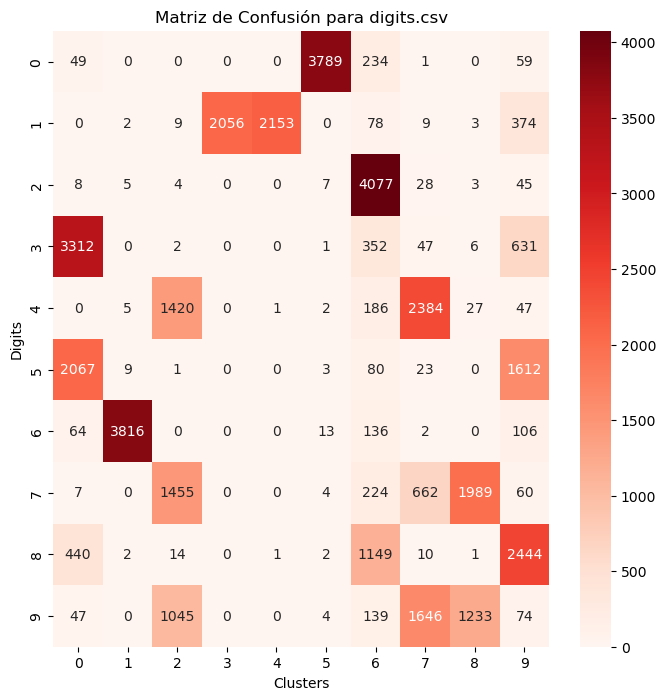

In [129]:
# Realizaremos una matriz de confusión para visualizar el desempeño del algoritmo. Esto lo implemente mas que nada para visualizar como 
# se distribuyen los digitos en cada cluster
true_labels = df_classificated['label']
predicted_labels = df_classificated['cluster']
confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Clusters')
plt.ylabel('Digits')
plt.title('Matriz de Confusión para digits.csv')
plt.show()

In [116]:

# Creamos un nuevo diccionario para contar la cantidad de veces en donde el digito fue clasificado 
# como el digito dominante
counts = {i : 0 for i in range(0,10)}
# Luego por cada dato del dataset, guardaremos la cantidad de veces en donde el digito 
# fue clasificado como el digito dominante para cada cluster ... 
for i in range(df_classificated.shape[0]):
    digit = df_classificated['label'][i]
    cluster = df_classificated['cluster'][i]
    if digit == uppermost_digit[cluster]: # Sumar si: el digito es igual al digito predominante del cluster el cual fue clasificado
        counts[digit] += 1
print_dict(counts)

# Por ejemplo, existio una cantidad 3789 de 0's los cuales fueron clasificados correctamente con respecto 
# al digito predominante del cluster asignado. 

0 * 3789
1 * 4209
2 * 4077
3 * 3312
4 * 2384
5 * 0
6 * 3816
7 * 3444
8 * 2444
9 * 0


In [103]:
# Ahora calcularemos la precision de cada digito en porcentaje
for digit, predicted_count in counts.items():
    # Obtenemos el cuociente entre el total de datos clasificados correctamente con respecto 
    # a la cantidad de datos totales del dataset original (labels)
    total_original_count = df_classificated['label'].value_counts().to_dict()[digit]
    precision = round((predicted_count / total_original_count) * 100, 3)# porcentaje
    print(f'{digit} |  {precision} %')

# Podemos observar en el resultado que el 2 fue el numero el cual el modelo predijo con mayor precision. Mientras que el 5, y 9 
# fueron los numeros que tuvieron un % de precision nula. Probablemente, debe ser por que el 5 tiene se parece mucho tanto al 3 como al 6,
# y el 9 con el 4 o 0, por lo que el modelo probablemente no fue capaz de clasificarlos correctamente. 
# Ademas en el grafico anterior podemos notar que no es posible distinguir correctamente el 5 y el 9. 

0 |  91.699 %
1 |  89.859 %
2 |  97.606 %
3 |  76.12 %
4 |  58.546 %
5 |  0.0 %
6 |  92.241 %
7 |  78.255 %
8 |  60.153 %
9 |  0.0 %


# 3.6 Agrupación de Dígitos similares (3 puntos)

Corre la función clusterize pero ahora solamente con `4` grupos. Registra las nuevas clasificaciones en un dataframe. (3 puntos)

RESPUESTA:

In [104]:
df_classificated_2 = clusterize(X_pca, y, 4)

Identifica los digitos que se agruparon en cada cluster y explica la razón de por cual el algoritmo GMM los podría haber agrupado de esa manera.

RESPUESTA:

In [105]:
give_clusters(df_classificated_2)


0 - {1, 2}
1 - {0, 1, 2, 3}
2 - {0, 1, 2}
3 - {0, 1, 2}
4 - {0, 1, 2, 3}
5 - {0, 1, 2}
6 - {1, 2}
7 - {0, 1, 2, 3}
8 - {0, 1, 2, 3}
9 - {0, 1, 2, 3}


👉🏻 Dado al resultado anterior, podemos visualizar que GMM agrupo solo los digitos en 4 grupos: 0, 1, 2 y 3. La razon principal de 
aquella forma de agrupamiento puede explicarse a partir del criterio de informacion de Akaike (AIC). Dado que este criterio nos permite evaluar la cantidad de componentes optimas del modelo para poder verificar que tan bien se ajusta frente a los datos generados. Como la cantidad de componentes fue baja, 
probablemente esta cantidad no fue lo suficiente para poder clasificar correctamente los datos. 

Teoricamente, tambien podriamos decir que la verosimilitud es baja, o no lo suficientemente maxima. Dado que, en base a esta funcion, podemos verificar la capacidad descriptiva que presenta cada dato. Sabemos que para encontrar el modelo que mejor se ajusta los datos es aquel el cual presenta un AIC suficientemente minimo. Esto podria cumplirse cuando la cantidad de componentes del modelo es suficientemente pequeña, y presenta una verosimilitud alta. En este caso, el modelo tiene pocas componentes, pero probablemente una baja verosimilitud. 

# Parte 4: KNN (12 puntos)

## 4.1 Separar train y test (4 puntos)

Toma en cuenta el dataset retornado al correr la función clusterize con `n=10`.
Separa el conjunto de datos en train (75%) y test (25%).
Utiliza el ***cluster*** al cual pertenece cada dato como variable de respuesta (y). También determina e imprime la cantidad de datos por cada cluster.

RESPUESTA:

In [106]:
y_response = df_classificated['cluster']
digits['label'] = y # Agregamos la columna label al dataset original

In [107]:
X_train, X_test, y_train, y_test = train_test_split(digits, y_response, test_size=0.25)
# Asumi que "imprimir la cantidad de datos por cada cluster" se refieren con respecto al y_train e y_test. Dado que estos contienen los clusters
# que pertenece cada dato del dataset correspondiente. 

print(' i | y_train | y_test ')
print("-" * 21)
for i in range(10):
    print(f' {i} |  {Counter(y_train)[i]}   |  {Counter(y_test)[i]} ')

 i | y_train | y_test 
---------------------
 0 |  4451   |  1543 
 1 |  2866   |  973 
 2 |  2993   |  957 
 3 |  1533   |  523 
 4 |  1611   |  544 
 5 |  2829   |  996 
 6 |  5023   |  1632 
 7 |  3591   |  1221 
 8 |  2507   |  755 
 9 |  4096   |  1356 


## 4.2 Determina el número óptimo de vecinos con KNeighborsClassifier. (4 puntos)
Los valores a probar son: 1, 5, 8 y 10. Utiliza la métrica score para justificar tu elección.

In [108]:
k_neighbors = [1, 5, 8, 10]
for k in k_neighbors: 
    nbrs = KNeighborsClassifier(n_neighbors=k)
    clf = nbrs.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f'Para {k} vecinos --> Score: {score}')

# Nos encontramos que para una cantidad de 10 vecinos, es el mejor valor al momento de clasificar, ya que presenta un nivel 
# de precisión mas alto que el resto. 


/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Para 1 vecinos --> Score: 0.8912380952380953


/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Para 5 vecinos --> Score: 0.9006666666666666


/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Para 8 vecinos --> Score: 0.8982857142857142


/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Para 10 vecinos --> Score: 0.9010476190476191


RESPUESTA:

## 4.3 Evalua el mejor clasificador de 4.2. (4 puntos)
 Comenta al respecto en el contexto del dataset acerca del rendimiento por cada cluster del mejor clasificador encontrado.

RESPUESTA:

In [109]:
nbrs = KNeighborsClassifier(n_neighbors=10)
clf = nbrs.fit(X_train, y_train)
clf.score(X_test, y_test)
y_prediction = clf.predict(X_test)
print(classification_report(y_test, y_prediction))

/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1543
           1       0.93      0.99      0.96       973
           2       0.86      0.90      0.88       957
           3       0.88      0.98      0.93       523
           4       0.88      0.99      0.93       544
           5       0.93      0.99      0.96       996
           6       0.97      0.74      0.84      1632
           7       0.93      0.89      0.91      1221
           8       0.77      0.95      0.85       755
           9       0.88      0.84      0.86      1356

    accuracy                           0.90     10500
   macro avg       0.90      0.92      0.90     10500
weighted avg       0.91      0.90      0.90     10500



👉🏻 Dentro del contexto del dataset, podemos visualizar que para cada clase se presenta una alta precision. Podemos verificar que el modelo KNN presenta mejor prediccion de algunos digitos en comparacion al modelo GMM. Sin embargo, podemos identificar una especie de 'similitud' con respecto al % de precision para cada digito en ambos modelos.  
Con el modelo GMM obtuvimos que dentro de los clusters que presentaban una alta prediccion se encuentra el 6. En este caso, para KNN tambien el 6 esta dentro de las clases con mayor precision. Asismismo, con KNN presentamos que las clases 8 y 2 son las que tienen una precision mas baja. Estos resultados tienen sentido, dado que estos numeros tienen mayor probabilidad de que sean clasificados por otros digitos, como el 0 o 1 respectivamente. 

Por una lado, podemos mencionar de manera general que todas las clases presentan un muy buen nivel de precision al momento de clasificar los datos del dataset. 
Al tener agrupados los datos en 10 clusters distintos presentamos una mayor precision al momento de clasificar los datos. 

Por otro lado, podemos analizar especificamente el rendimiento de las clases mencionadas anteriormente que presentan alta y baja precision, respectivamente:
* 6: Presento un rendimiento de un 97%, es decir, gran parte de los datos que fueron agrupados dentro del cluster 6 corresponden al digito 6
* 8: Presento un rendimiento de un 77%, es decir, no necesariamente gran parte de los datos que fueron agrupados dentro del cluster 8 corresponden al digito 8. En este sentido, probablemente existan digitos distintos de 8 (como por ejemplo el 0 o 9) que tambien fueron considerados dentro del cluster 8. 

